# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [14]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ust-nera
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | morogoro
Processing Record 4 of Set 1 | kisangani
Processing Record 5 of Set 1 | hola
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | great falls
Processing Record 8 of Set 1 | olonkinbyen
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 13 of Set 1 | crane
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | worland
Processing Record 18 of Set 1 | enewetak
Processing Record 19 of Set 1 | whakatane
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | kampong cham


In [62]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [63]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ust-nera,64.5667,143.2000,-31.26,99,97,0.84,RU,1707320895
1,iqaluit,63.7506,-68.5145,-21.15,65,75,8.23,CA,1707320896
2,morogoro,-6.8167,37.6667,24.93,86,54,0.83,TZ,1707320897
3,kisangani,0.5167,25.2000,32.57,39,6,1.59,CD,1707320898
4,hola,51.5377,23.1902,3.10,81,100,6.54,PL,1707320899


In [84]:
import os

# Check if the directory exists, if not, create it
output_directory = "output_data"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Export the City_Data into a CSV file
city_data_df.to_csv(os.path.join(output_directory, "cities.csv"), index_label="City_ID")


In [85]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [86]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,-31.26,99,97,0.84,RU,1707320895
1,iqaluit,63.7506,-68.5145,-21.15,65,75,8.23,CA,1707320896
2,morogoro,-6.8167,37.6667,24.93,86,54,0.83,TZ,1707320897
3,kisangani,0.5167,25.2000,32.57,39,6,1.59,CD,1707320898
4,hola,51.5377,23.1902,3.10,81,100,6.54,PL,1707320899


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

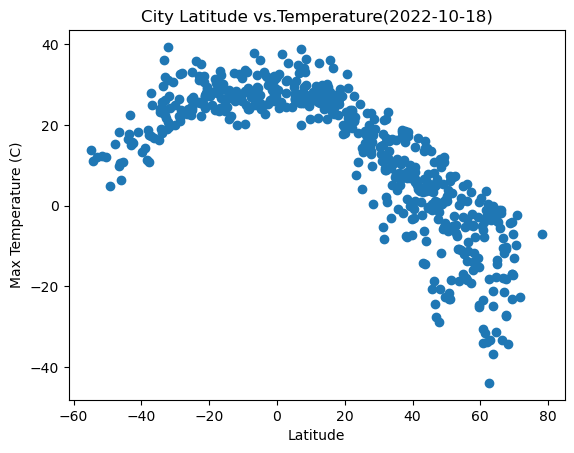

In [87]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs.Temperature(2022-10-18)')
# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

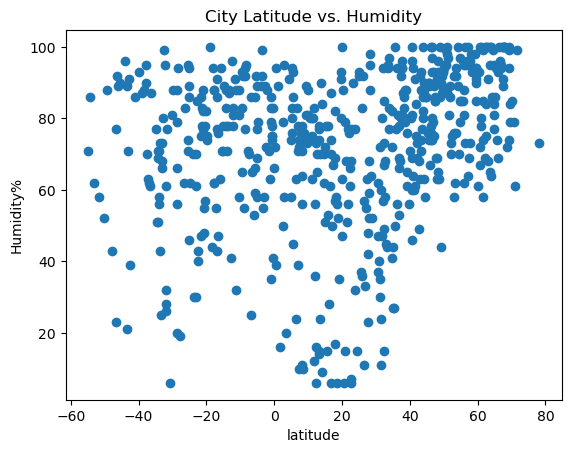

In [88]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel('latitude')
plt.ylabel('Humidity%')
plt.title('City Latitude vs. Humidity')
#plt.savefig("output_data/Fig2.png")
plt.show()

#### Latitude Vs. Cloudiness

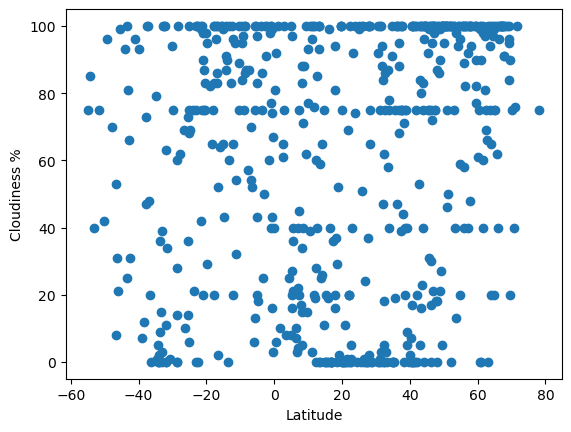

In [89]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

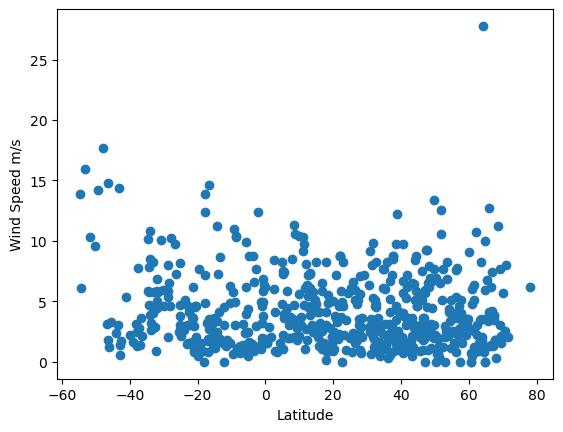

In [90]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed']) 

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed m/s')
# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [91]:
# Define a function to create Linear Regression plots
def create_regression_plot(x, y):
    # Fit a linear regression model
    coefficients = np.polyfit(x, y, 1)
    slope = coefficients[0]
    intercept = coefficients[1]

    # Create a scatter plot
    plt.scatter(x, y, color='blue', label='Data')

    # Create a regression line
    regression_line = slope * x + intercept
    plt.plot(x, regression_line, color='red', label='Regression Line')


In [92]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,-31.26,99,97,0.84,RU,1707320895
1,iqaluit,63.7506,-68.5145,-21.15,65,75,8.23,CA,1707320896
3,kisangani,0.5167,25.2000,32.57,39,6,1.59,CD,1707320898
4,hola,51.5377,23.1902,3.10,81,100,6.54,PL,1707320899
6,great falls,47.5002,-111.3008,-3.34,86,100,3.09,US,1707320901


In [93]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,morogoro,-6.8167,37.6667,24.93,86,54,0.83,TZ,1707320897
5,new norfolk,-42.7826,147.0587,15.72,91,66,0.55,AU,1707320439
8,blackmans bay,-43.0167,147.3167,15.07,71,81,1.38,AU,1707320427
9,grytviken,-54.2811,-36.5092,11.04,86,85,6.09,GS,1707320376
10,adamstown,-25.0660,-130.1015,24.68,86,100,4.69,PN,1707320905


###  Temperature vs. Latitude Linear Regression Plot

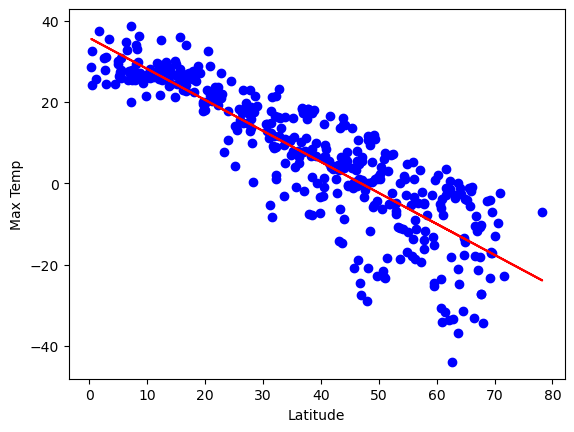

In [94]:
plt.xlabel('Latitude')
plt.ylabel('Max Temp')


# Perform linear regression on Northern Hemisphere
create_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])


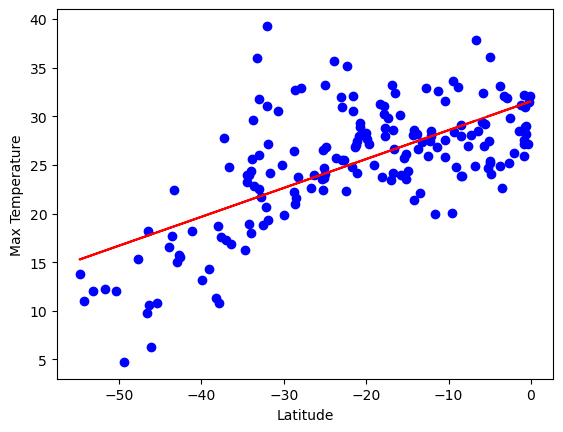

In [95]:
# Linear regression on Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')


# Create DataFrame with Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Perform linear regression on Southern Hemisphere
create_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

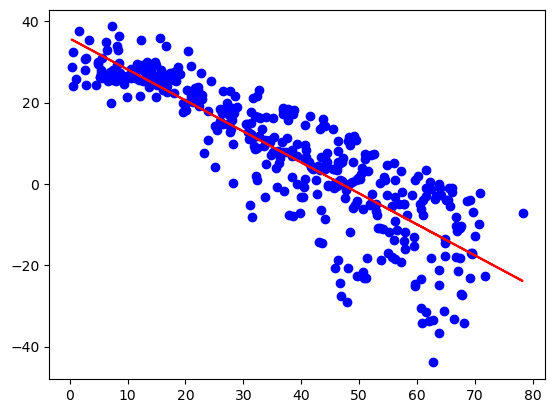

In [96]:
# Northern Hemisphere
# Create DataFrame with Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Perform linear regression on Northern Hemisphere
create_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])


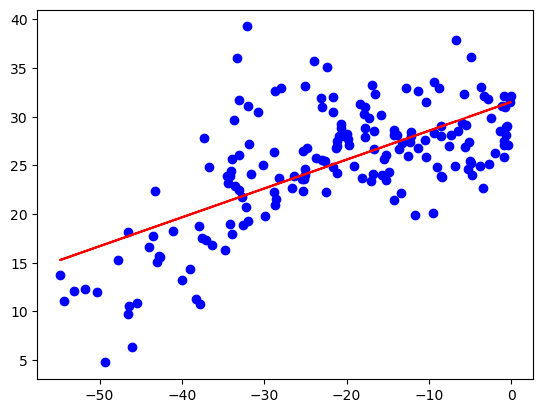

In [97]:
# Southern Hemisphere
# Create DataFrame with Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Perform linear regression on Southern Hemisphere
create_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

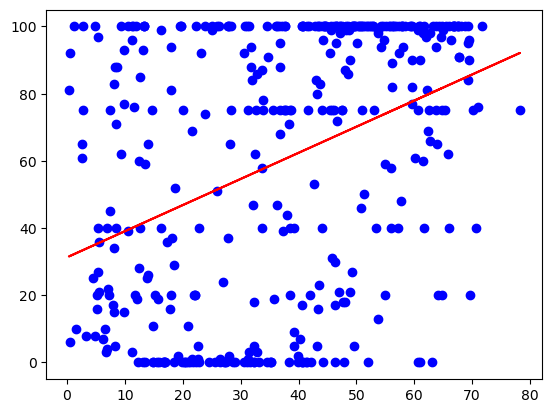

In [98]:
# Northern Hemisphere
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Perform linear regression on Northern Hemisphere for Cloudiness
create_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

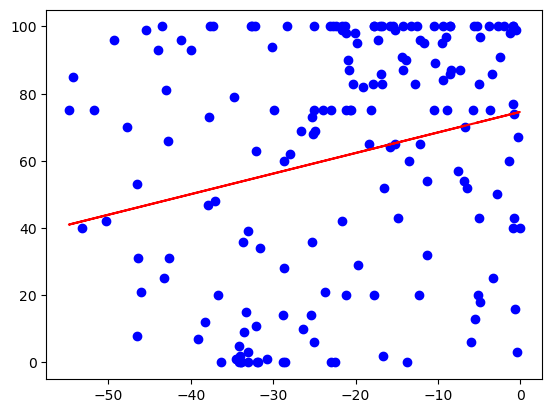

In [99]:
# Southern Hemisphere

# Perform linear regression on Southern Hemisphere for Cloudiness
create_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

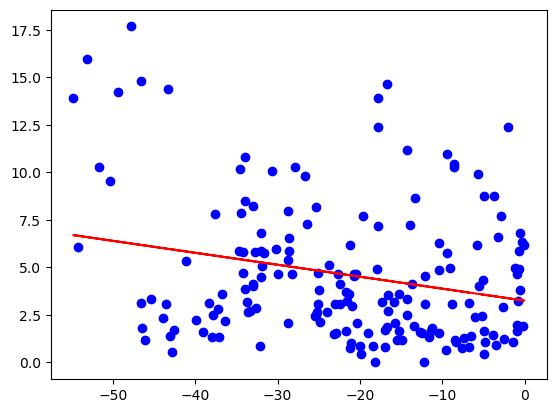

In [100]:
# Northern Hemisphere
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0]

# Perform linear regression on Northern Hemisphere for Wind Speed
create_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

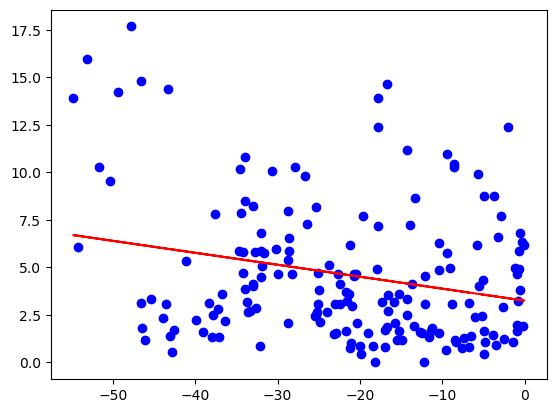

In [80]:
# Southern Hemisphere
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Perform linear regression on Southern Hemisphere for Wind Speed
create_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** YOUR RESPONSE HERE